In [3]:
import numpy as np
import matplotlib.pyplot as plt

from imripy import constants as c, kepler, merger_system as ms, halo, inspiral, plot_utils as pu
from imripy.kepler import KeplerOrbit
import plotting
import common

This notebook gives an overview over the environmental effects that imripy is capable of. There is GW emission, DM Spikes with dynamical friction and accretion, stellar distributions with stellar diffusion, and accretion disks with gas dynamical friction, type--I torque, and geometric drag. 

Plots the phase space flow for all of them, and, at the end, calculates their energy loss and braking index.

# Environmental Effects

In [4]:
m1 = 1e5 * c.solar_mass_to_pc
m2 = 10. * c.solar_mass_to_pc

hs = ms.HostSystem(m1)

# GW emission

In [3]:
gw = inspiral.forces.GWLoss()

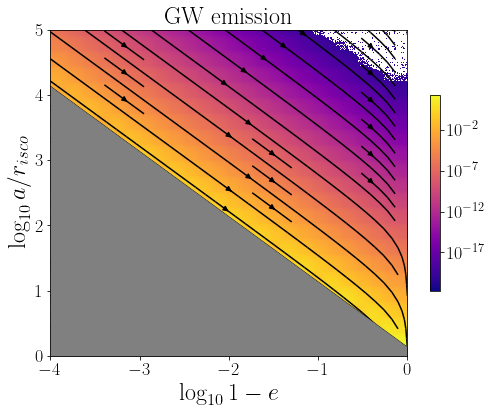

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
a_grid = np.geomspace(hs.r_isco, 1e6*hs.r_isco, 25)
e_grid = 1.-np.geomspace(1e-4, 1., 25)

opt = inspiral.Classic.EvolutionOptions( dissipativeForces={gw})

ko = KeplerOrbit(hs, m2, 0.)

im = pu.streamline(ax, hs, opt, ko, a_grid, e_grid)

ax.set_title("GW emission")

fig.colorbar(im, shrink=0.6)

ax.set_ylim(top=5.)

ax.set_xlabel(r"$\log_{10} 1-e$"); ax.set_ylabel(r"$\log_{10} a/r_{isco}$")
fig.savefig("plots/psf_gw.pdf", bbox_inches='tight')

# Dark Matter Spike

In [5]:
spike_73, df_73 = common.DMSpike(hs, 7./3.)
spike_32, df_32 = common.DMSpike(hs, 3./2.)

In [14]:
print(f"3/2 spike: r_spike={spike_32.r_spike:.2e}, rho_6={spike_32.density(1e-6)/c.solar_mass_to_pc:.2e}")
print(f"7/3 spike: r_spike={spike_73.r_spike:.2e}, rho_6={spike_73.density(1e-6)/c.solar_mass_to_pc:.2e}")

3/2 spike: r_spike=1.95e+00, rho_6=4.93e+11
7/3 spike: r_spike=1.95e+00, rho_6=8.62e+16


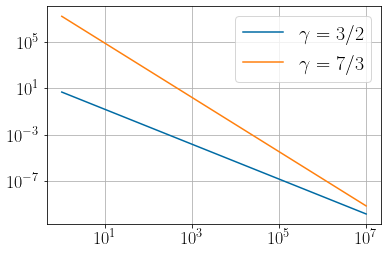

In [6]:
r_grid = np.geomspace(hs.r_isco, 1e7 * hs.r_isco)

plt.loglog(r_grid/hs.r_isco, spike_32.density(r_grid), label="$\gamma=3/2$")
plt.loglog(r_grid/hs.r_isco, spike_73.density(r_grid), label="$\gamma=7/3$")

plt.grid(); plt.legend()

#### Phase Space flow of the different terms in the dynamical friction eq

In [7]:
df_old = inspiral.forces.DynamicalFriction(halo=spike_32, haloPhaseSpaceDescription=True, includeHigherVelocities=False)

df_new = inspiral.forces.DynamicalFriction(halo=spike_32, haloPhaseSpaceDescription=True, includeHigherVelocities=True)

df_tot = inspiral.forces.DynamicalFriction(halo=spike_32, haloPhaseSpaceDescription=True, includeHigherVelocities=True, 
                                            relativisticCorrections=True)

(0.0, 3.1e-09)
(0.0, 3.1e-09)
(0.0, 3.1e-09)


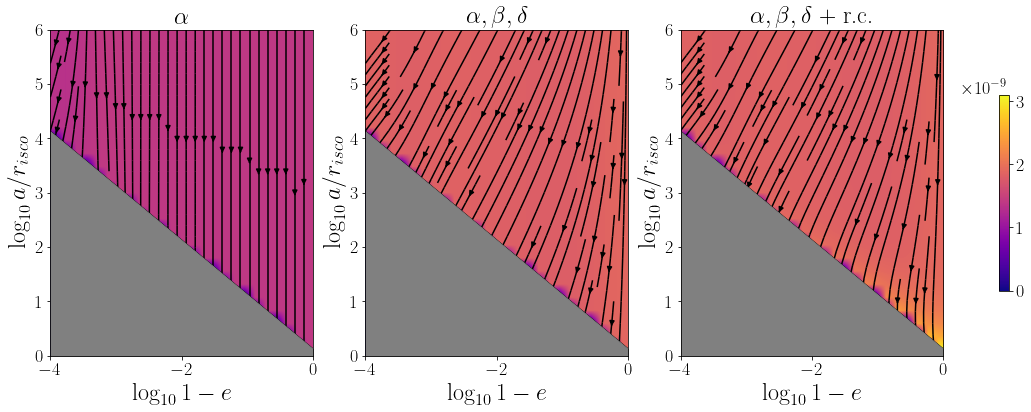

In [33]:
fig,axs = plt.subplots(1,3, figsize=(20,6))
a_grid = np.geomspace(hs.r_isco, 1e6*hs.r_isco, 25)
e_grid = 1.-np.geomspace(1e-4, 1., 25)

opt_old = inspiral.Classic.EvolutionOptions( dissipativeForces=[df_old])

opt_new = inspiral.Classic.EvolutionOptions( dissipativeForces=[df_new])

opt_tot = inspiral.Classic.EvolutionOptions( dissipativeForces=[df_tot])

ko = KeplerOrbit(hs, m2, 0.)

vmin, vmax = 0., 3.1e-9
im = pu.streamline(axs[0], hs, opt_old, ko, a_grid, e_grid, norm='linear', vmin=vmin, vmax=vmax)
print(im.get_clim())
axs[0].set_title(r"$\alpha$")

im = pu.streamline(axs[1], hs, opt_new, ko, a_grid, e_grid, norm='linear', vmin=vmin, vmax=vmax)
print(im.get_clim())
axs[1].set_title(r"$\alpha, \beta, \delta$")

im = pu.streamline(axs[2], hs, opt_tot, ko, a_grid, e_grid, norm='linear', vmin=vmin, vmax=vmax)
print(im.get_clim())
axs[2].set_title(r"$\alpha, \beta, \delta$ + r.c.")

fig.colorbar(im, ax=axs, shrink=0.6)

for ax in axs:
    ax.set_xlabel(r"$\log_{10} 1-e$"); ax.set_ylabel(r"$\log_{10} a/r_{isco}$")
fig.savefig("plots/psf_dm_terms.pdf", bbox_inches="tight")

#### Phase Space flow for different power laws

In [11]:
df_32 = inspiral.forces.DynamicalFriction(halo=spike_32, haloPhaseSpaceDescription=True, includeHigherVelocities=True,
                                             relativisticCorrections=True)
opt_32 = inspiral.Classic.EvolutionOptions( dissipativeForces=[df_32])

df_73 = inspiral.forces.DynamicalFriction(halo=spike_73, haloPhaseSpaceDescription=True, includeHigherVelocities=True,
                                             relativisticCorrections=True)
opt_73 = inspiral.Classic.EvolutionOptions( dissipativeForces=[df_73])

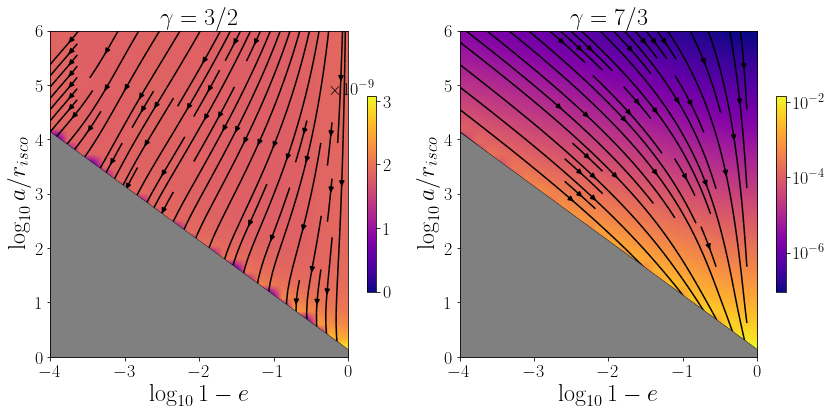

In [12]:
fig,axs = plt.subplots(1,2, figsize=(14,6))
a_grid = np.geomspace(hs.r_isco, 1e6*hs.r_isco, 25)
e_grid = 1.-np.geomspace(1e-4, 1., 25)

ko = KeplerOrbit(hs, m2, 0.)

im = pu.streamline(axs[0], hs, opt_32, ko, a_grid, e_grid, norm='linear')
fig.colorbar(im, ax=axs[0], shrink=0.6)
axs[0].set_title("$\gamma = 3/2$")

im = pu.streamline(axs[1], hs, opt_73, ko, a_grid, e_grid)
fig.colorbar(im, ax=axs[1], shrink=0.6)
axs[1].set_title(r"$\gamma = 7/3$")

fig.subplots_adjust(wspace=0.1)
for ax in axs:
    ax.set_xlabel(r"$\log_{10} 1-e$"); ax.set_ylabel(r"$\log_{10} a/r_{isco}$")
fig.subplots_adjust(wspace=0.1)
fig.savefig("plots/psf_dm_pwrlaw.pdf", bbox_inches="tight")

### Compare Accretion and Dynamical Friction

In [13]:
acc_32 = inspiral.forces.AccretionLoss(halo=spike_32)
acc_73 = inspiral.forces.AccretionLoss(halo=spike_73)

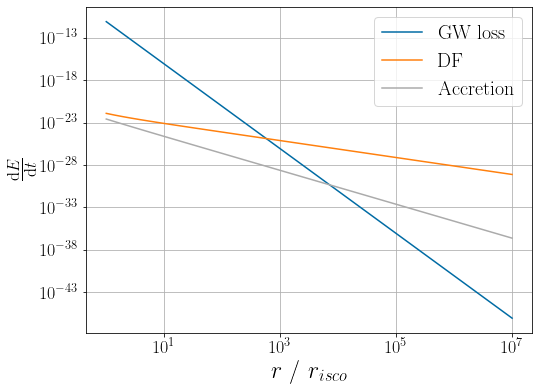

In [34]:
fig = plt.figure(figsize=(8,6))
r_grid = np.geomspace(hs.r_isco, 1e7 * hs.r_isco)
l, = plt.loglog(r_grid/hs.r_isco, np.abs([gw.dE_dt(hs, KeplerOrbit(hs, m2, r, e=0.), opt=inspiral.Classic.EvolutionOptions()) for r in r_grid]), 
                label="GW loss")

l, = plt.loglog(r_grid/hs.r_isco, np.abs([df_tot.dE_dt(hs, KeplerOrbit(hs, m2, r, e=0.), opt=inspiral.Classic.EvolutionOptions()) for r in r_grid]), 
            label="DF")

l, = plt.loglog(r_grid/hs.r_isco, np.abs([acc_32.dE_dt(hs, KeplerOrbit(hs, m2, r, e=0.), opt=inspiral.Classic.EvolutionOptions()) for r in r_grid]), 
            label="Accretion")


plt.legend(); plt.grid()
plt.xlabel(r"$r$ / $r_{isco}$"); plt.ylabel(r"$\dv{E}{t}$")
fig.savefig('plots/dm_df_vs_acc.pdf', bbox_inches='tight')

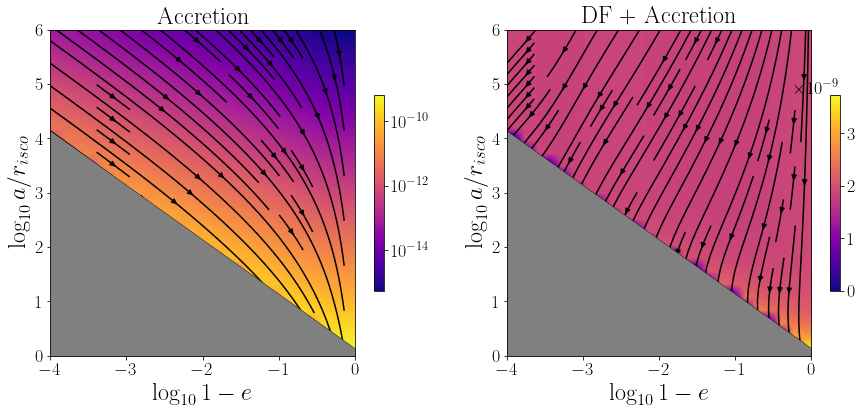

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
a_grid = np.geomspace(hs.r_isco, 1e6*hs.r_isco, 25)
e_grid = 1.-np.geomspace(1e-4, 1., 25)

opt1 = inspiral.Classic.EvolutionOptions( dissipativeForces=[acc_32])
opt2 = inspiral.Classic.EvolutionOptions( dissipativeForces=[df_tot, acc_32])

ko = KeplerOrbit(hs, m2, 0.)


im = pu.streamline(axs[0], hs, opt1, ko, a_grid, e_grid)
fig.colorbar(im, ax=axs[0], shrink=0.6)
axs[0].set_title("Accretion")

im = pu.streamline(axs[1], hs, opt2, ko, a_grid, e_grid, norm='linear')
fig.colorbar(im, ax=axs[1], shrink=0.6)
axs[1].set_title("DF + Accretion")

for ax in axs:
    ax.set_xlabel(r"$\log_{10} 1-e$"); ax.set_ylabel(r"$\log_{10} a/r_{isco}$")
fig.savefig("plots/psf_dm_acc_df.pdf", bbox_inches='tight')

# Stellar Distribution

In [16]:
stellarHalo, stellarDiffusion = common.StellarDistribution(hs, E_m_s=m2)

In [17]:
stellarDiffusion2 = inspiral.forces.StellarDiffusionAna(hs, stellarHalo, E_m_s=m2)

Options: dissipative forces employed {Stellar Diffusion*, }, accuracy = 1.0e-08


/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:1066: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  dE_dt = 2.* ko.m2 * (1.-e**2)**(3./2.) /2./np.pi * quad(integrand, 0., np.pi, limit=100)[0] # the 1/T is in the 1/2pi
/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:1088: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  dL_dt = 2.* ko.m2  * (1.-e**2)**(3./2.) /2./np.pi * quad(integrand, 0., np.pi, limit=100)[0]  # the 1/T is in the 1/

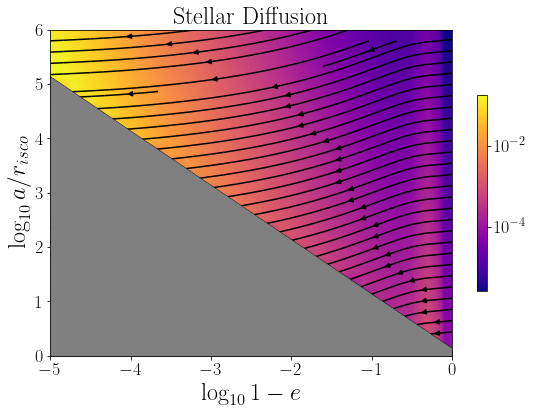

In [18]:
fig, ax = plt.subplots(1,1, figsize=(9,6))
a_grid = np.geomspace(hs.r_isco, 1e6*hs.r_isco, 25)
e_grid = 1.-np.geomspace(1e-5, 1., 25)

opt_sd = inspiral.Classic.EvolutionOptions( dissipativeForces=[stellarDiffusion], accuracy=1e-8)

ko = KeplerOrbit(hs, m2, 0.)

print(opt_sd)
im = pu.streamline(ax, hs, opt_sd, ko, a_grid, e_grid)
ax.set_title(r"Stellar Diffusion")

fig.colorbar(im, shrink=0.6)
ax.set_xlabel(r"$\log_{10} 1-e$"); ax.set_ylabel(r"$\log_{10} a/r_{isco}$")
fig.savefig("plots/psf_sd.pdf", bbox_inches="tight")

# Accretion Disk

In [16]:
alpha = 0.1
f_edd = 0.1
eps = 0.1
alphaDisk = halo.AlphaDisk(m1, alpha, f_edd, eps)
betaDisk = halo.BetaDisk(m1, alpha, f_edd, eps)

In [17]:
Mdot_edd = (2.2 * 1e-9 * m1 /0.3064)
dmDisk = halo.DerdzinskiMayerDisk(m1, f_edd*Mdot_edd, alpha)
r_grid = np.geomspace(1.5*hs.r_isco, 1e7*hs.r_isco, 1000)
dmDisk_int = dmDisk.CreateInterpolatedHalo(r_grid)

In [18]:
gt1_dm = inspiral.forces.GasInteraction(dmDisk_int)

/media/data/Documents/PhD/imripy/src/imripy/halo/baryonic.py:978: RuntimeWarning: invalid value encountered in divide
  interpHalo.density = lambda r, z : density_interp(r)*np.exp(-z**2/scale_height_interp(r)**2)


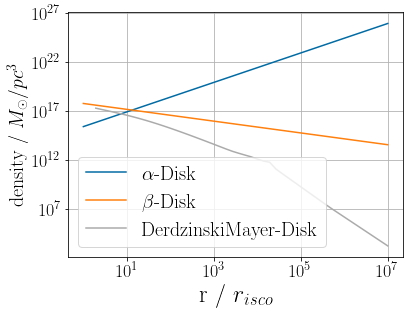

In [19]:
plt.figure(figsize=(6,6 * 6./8.))
r_grid = np.geomspace(hs.r_isco, 1e7*hs.r_isco)
ax_risco = plt.gca()

l, = ax_risco.loglog(r_grid/hs.r_isco, alphaDisk.density(r_grid)/c.solar_mass_to_pc, label="$\\alpha$-Disk")
l, = ax_risco.loglog(r_grid/hs.r_isco, betaDisk.density(r_grid)/c.solar_mass_to_pc, label="$\\beta$-Disk")
l, = ax_risco.loglog(r_grid/hs.r_isco, dmDisk_int.density(r_grid, 0.)/c.solar_mass_to_pc, label="DerdzinskiMayer-Disk")


ax_risco.set_yscale('log');# plt.xscale('log') 
ax_risco.set_xlabel("r / $r_{isco}$"); ax_risco.set_ylabel("density / $M_{\odot}/pc^3$", fontsize=20)

ax_risco.grid(); ax_risco.legend()
#plt.savefig("plots/dm_disk_density.pdf", bbox_inches='tight')

### Gas Dynamical Friction

In [24]:
gdf_alpha = inspiral.forces.GasDynamicalFriction(disk=alphaDisk)
gdf_beta = inspiral.forces.GasDynamicalFriction(disk=betaDisk)
gdf_dm = inspiral.forces.GasDynamicalFriction(disk=dmDisk_int)

/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:534: RuntimeWarning: invalid value encountered in log
  1./2. * np.log((1. + v_rel_tot/c_s)/(1. - v_rel_tot/c_s)) - v_rel_tot/c_s) # subsonic regime
/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:80: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:105: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  return -(1.-e**2)**(3./2.)/2./np.pi * quad(integrand, 0., 2.*np.pi, limit = 100)[0]
/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:105: IntegrationWarning: The integral is probably divergent, or slowly conv

(1.0237936344200792e-07, 3.802056724709041e+19)
(2.3223107580571466e-05, 11935.559110287244)


/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:534: RuntimeWarning: divide by zero encountered in divide
  1./2. * np.log((1. + v_rel_tot/c_s)/(1. - v_rel_tot/c_s)) - v_rel_tot/c_s) # subsonic regime
/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:534: RuntimeWarning: invalid value encountered in double_scalars
  1./2. * np.log((1. + v_rel_tot/c_s)/(1. - v_rel_tot/c_s)) - v_rel_tot/c_s) # subsonic regime
/media/data/Documents/PhD/imripy/src/imripy/halo/baryonic.py:978: RuntimeWarning: invalid value encountered in double_scalars
  interpHalo.density = lambda r, z : density_interp(r)*np.exp(-z**2/scale_height_interp(r)**2)
/media/data/Documents/PhD/imripy/src/imripy/inspiral/forces.py:533: RuntimeWarning: invalid value encountered in log
  1./2. * np.log(1. - (c_s/v_rel_tot)**2) + ln_Lambda, # supersonic regime


(1.971597642961673e-09, 0.00839673586057691)


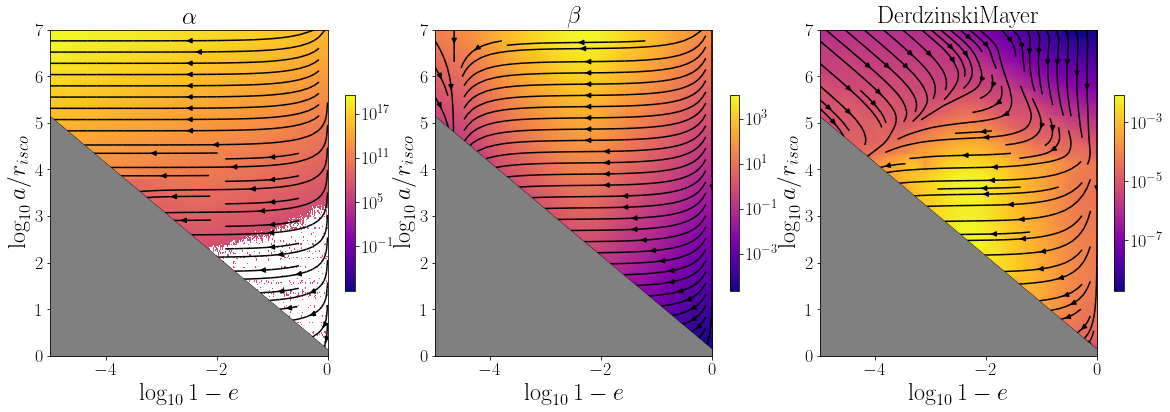

In [25]:
fig,axs = plt.subplots(1,3, figsize=(20,6))
a_grid = np.geomspace(hs.r_isco, 1e7*hs.r_isco, 25)
e_grid = 1.-np.geomspace(1e-5, 1., 25)

opt_alpha = inspiral.Classic.EvolutionOptions( dissipativeForces=[gdf_alpha])

opt_beta = inspiral.Classic.EvolutionOptions( dissipativeForces=[gdf_beta])

opt_dm = inspiral.Classic.EvolutionOptions( dissipativeForces=[gdf_dm])

ko = KeplerOrbit(hs, m2, 0.)

im = pu.streamline(axs[0], hs, opt_alpha, ko, a_grid, e_grid)
fig.colorbar(im, ax=axs[0], shrink=0.6)
print(im.get_clim())
axs[0].set_title(r"$\alpha$")

im = pu.streamline(axs[1], hs, opt_beta, ko, a_grid, e_grid)
fig.colorbar(im, ax=axs[1], shrink=0.6)
print(im.get_clim())
axs[1].set_title(r"$\beta$")

im = pu.streamline(axs[2], hs, opt_dm, ko, a_grid, e_grid)
fig.colorbar(im, ax=axs[2], shrink=0.6)
print(im.get_clim())
axs[2].set_title(r"DerdzinskiMayer")

fig.subplots_adjust(wspace=0.11)
for ax in axs:
    ax.set_xlabel(r"$\log_{10} 1-e$"); ax.set_ylabel(r"$\log_{10} a/r_{isco}$"); ax.set_xlim(right=0.)
fig.savefig("plots/ad_psf_disks.pdf", bbox_inches="tight")

(1.971597642961673e-09, 0.00839673586057691)
(4.4869763835549296e-12, 0.004616051412036085)


/media/data/Documents/PhD/imripy/src/imripy/halo/baryonic.py:978: RuntimeWarning: divide by zero encountered in double_scalars
  interpHalo.density = lambda r, z : density_interp(r)*np.exp(-z**2/scale_height_interp(r)**2)


(5.489273952093174e-10, 0.003989231789672597)


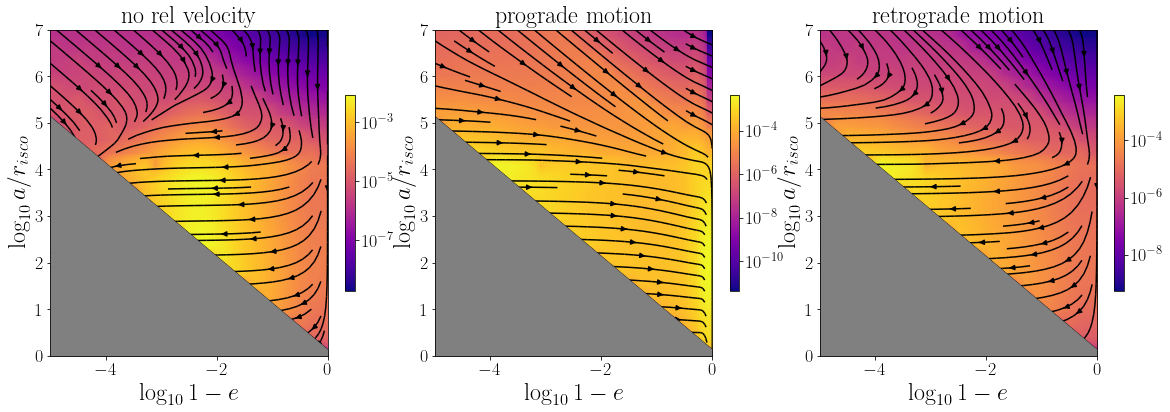

In [26]:
fig,axs = plt.subplots(1,3, figsize=(20,6))
a_grid = np.geomspace(hs.r_isco, 1e7*hs.r_isco, 25)
e_grid = 1.-np.geomspace(1e-5, 1., 25)

gdf_dm.relativisticCorrections = False

opt_co = inspiral.Classic.EvolutionOptions( dissipativeForces={gdf_dm})

opt_rel = inspiral.Classic.EvolutionOptions( dissipativeForces={gdf_dm}, considerRelativeVelocities=True)

ko = KeplerOrbit(hs, m2, 0.)

im = pu.streamline(axs[0], hs, opt_co, ko, a_grid, e_grid)
fig.colorbar(im, ax=axs[0], shrink=0.6)
print(im.get_clim())
axs[0].set_title("no rel velocity")

im = pu.streamline(axs[1], hs, opt_rel, ko, a_grid, e_grid)
fig.colorbar(im, ax=axs[1], shrink=0.6)
print(im.get_clim())
axs[1].set_title("prograde motion")

ko = KeplerOrbit(hs, m2, 0., inclination_angle=np.pi)
im = pu.streamline(axs[2], hs, opt_rel, ko, a_grid, e_grid)
fig.colorbar(im, ax=axs[2], shrink=0.6)
print(im.get_clim())
axs[2].set_title("retrograde motion")

fig.subplots_adjust(wspace=0.11)
for ax in axs:
    ax.set_xlabel(r"$\log_{10} 1-e$"); ax.set_ylabel(r"$\log_{10} a/r_{isco}$"); ax.set_xlim(right=0.)
fig.savefig("plots/ad_df_psf_rv.pdf", bbox_inches="tight")

(1.9715978232807976e-09, 0.008396175754241949)
(4.4869763835549296e-12, 0.004616051412138687)
(5.489275716331144e-10, 0.00398923362682554)


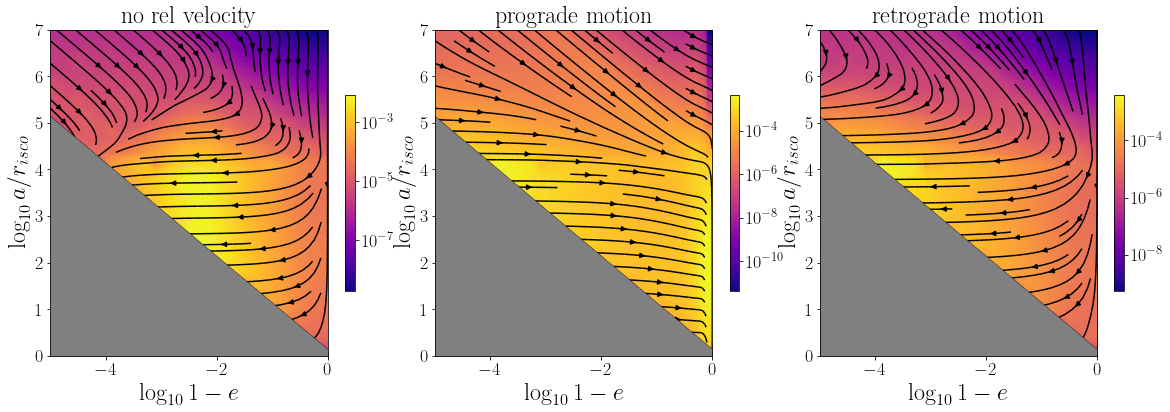

In [27]:
fig,axs = plt.subplots(1,3, figsize=(20,6))
a_grid = np.geomspace(hs.r_isco, 1e7*hs.r_isco, 25)
e_grid = 1.-np.geomspace(1e-5, 1., 25)

gdf_dm.relativisticCorrections = True

opt_co = inspiral.Classic.EvolutionOptions( dissipativeForces={gdf_dm})

opt_rel = inspiral.Classic.EvolutionOptions( dissipativeForces={gdf_dm}, considerRelativeVelocities=True)

ko = KeplerOrbit(hs, m2, 0.)

im = pu.streamline(axs[0], hs, opt_co, ko, a_grid, e_grid)
fig.colorbar(im, ax=axs[0], shrink=0.6)
print(im.get_clim())
axs[0].set_title("no rel velocity")

im = pu.streamline(axs[1], hs, opt_rel, ko, a_grid, e_grid)
fig.colorbar(im, ax=axs[1], shrink=0.6)
print(im.get_clim())
axs[1].set_title("prograde motion")

ko = KeplerOrbit(hs, m2, 0., inclination_angle=np.pi)
im = pu.streamline(axs[2], hs, opt_rel, ko, a_grid, e_grid)
fig.colorbar(im, ax=axs[2], shrink=0.6)
print(im.get_clim())
axs[2].set_title("retrograde motion")

fig.subplots_adjust(wspace=0.11)
for ax in axs:
    ax.set_xlabel(r"$\log_{10} 1-e$"); ax.set_ylabel(r"$\log_{10} a/r_{isco}$"); ax.set_xlim(right=0.)
#fig.savefig("plots/ad_df_psf_rv_rc.pdf", bbox_inches="tight")

### Geometric Drag

In [28]:
r_stellar = 6.95e8 * c.m_to_pc # solar radius
ggd_dm = inspiral.forces.GasGeometricDrag(r_stellar, disk=dmDisk_int)

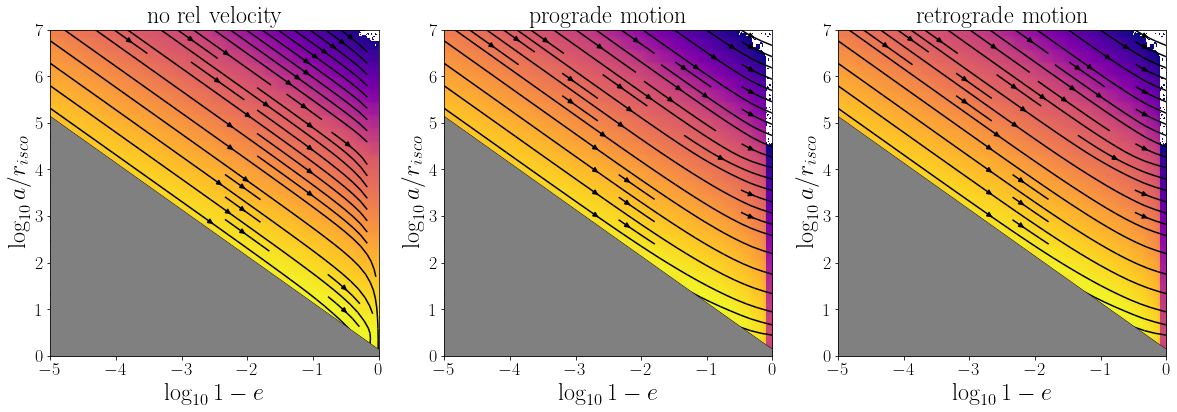

In [30]:
fig,axs = plt.subplots(1,3, figsize=(20,6))
a_grid = np.geomspace(hs.r_isco, 1e7*hs.r_isco, 25)
e_grid = 1.-np.geomspace(1e-5, 1., 25)

opt_co = inspiral.Classic.EvolutionOptions( dissipativeForces={ggd_dm})

opt_rel = inspiral.Classic.EvolutionOptions( dissipativeForces={ggd_dm}, considerRelativeVelocities=True)

opt_relcounter = inspiral.Classic.EvolutionOptions( dissipativeForces={ggd_dm}, considerRelativeVelocities=True,
                                                          progradeRotation=False)

ko = KeplerOrbit(hs, m2, 0.)

pu.streamline(axs[0], hs, opt_co, ko, a_grid, e_grid)
axs[0].set_title("no rel velocity")
pu.streamline(axs[1], hs, opt_rel, ko, a_grid, e_grid)
axs[1].set_title("prograde motion")
pu.streamline(axs[2], hs, opt_relcounter, ko, a_grid, e_grid)
axs[2].set_title("retrograde motion")

for ax in axs:
    ax.set_xlabel(r"$\log_{10} 1-e$"); ax.set_ylabel(r"$\log_{10} a/r_{isco}$")
#fig.savefig("plots/ad_gd_psf_rv.pdf", bbox_inches="tight")

## Braking Index

In [31]:
def plot_braking_index(hs, a, f, ax, **kwargs):
    """ 
    Calculates the braking index numerically
    """
    da_dt = np.array([inspiral.Classic.da_dt(hs, KeplerOrbit(hs, m2, r), 
                                 opt=inspiral.Classic.EvolutionOptions(dissipativeForces=[f])) for r in a])
    
    dda_dt2 = np.gradient(2.*np.log(np.abs(da_dt)), np.log(a_grid))*da_dt**2/a_grid
    #dda_dt2 = np.gradient(da_dt**2, np.log(a_grid))/a_grid
    n_b = 5./3. - 2./3. * a*dda_dt2 / da_dt**2
    
    ax.plot(a/hs.r_isco, n_b, **kwargs)


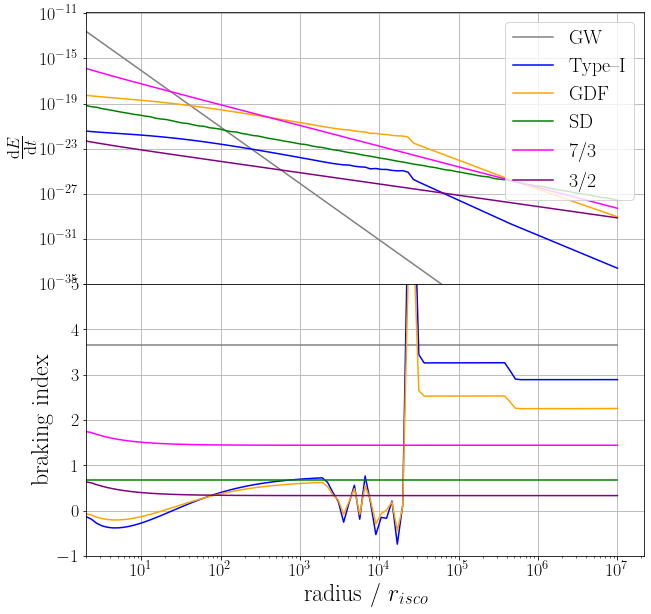

In [36]:
fig, axs = plt.subplots(2,1, figsize=(10,10), sharex='all')
axs[0].set_prop_cycle('color',['b', 'orange', 'green', 'magenta', 'purple'])

a_grid = np.geomspace(2*hs.r_isco, 1e7*hs.r_isco, 100)

opt = inspiral.Classic.EvolutionOptions()

l, = axs[0].loglog(a_grid/hs.r_isco, np.abs([ gw.dE_dt(hs, KeplerOrbit(hs, m2, r), opt) for r in a_grid]), 
         label="GW", color='gray')
#plot_braking_index(hs, np.linspace(2*hs.r_isco, 1e7*hs.r_isco, 100), gw, axs[1], color=l.get_c())
axs[1].plot(a_grid/hs.r_isco, np.ones(np.shape(a_grid))*11./3., color=l.get_c())


l, = axs[0].loglog(a_grid/hs.r_isco, np.abs([ gt1_dm.dE_dt(hs, KeplerOrbit(hs, m2, r), opt) for r in a_grid]), 
                     label="Type--I")
plot_braking_index(hs, a_grid, gt1_dm, axs[1], color=l.get_c())

l, = axs[0].loglog(a_grid/hs.r_isco, np.abs([ gdf_dm.dE_dt(hs, KeplerOrbit(hs, m2, r), opt) for r in a_grid]), 
         label="GDF")
plot_braking_index(hs, a_grid, gdf_dm, axs[1], color=l.get_c())

l, = axs[0].loglog(a_grid/hs.r_isco, np.abs([ stellarDiffusion.dE_dt(hs, KeplerOrbit(hs, m2, r), opt) for r in a_grid]), 
         label="SD")
plot_braking_index(hs, a_grid, stellarDiffusion2, axs[1], color=l.get_c())

l, = axs[0].loglog(a_grid/hs.r_isco, np.abs([ df_73.dE_dt(hs, KeplerOrbit(hs, m2, r), opt) for r in a_grid]), 
         label="7/3")
plot_braking_index(hs, a_grid, df_73, axs[1], color=l.get_c())

l, = axs[0].loglog(a_grid/hs.r_isco, np.abs([ df_32.dE_dt(hs, KeplerOrbit(hs, m2, r), opt) for r in a_grid]), 
         label="3/2")
plot_braking_index(hs, a_grid, df_32, axs[1], color=l.get_c())

axs[1].set_xlabel("radius / $r_{isco}$")
axs[0].set_ylabel("$\dv{E}{t}$")
axs[1].set_ylabel("braking index")
axs[0].set_ylim(bottom=1e-35)
axs[1].set_ylim(-1, 5)
axs[1].set_xlim(left=a_grid[0]/hs.r_isco)
axs[0].grid(); axs[1].grid();
axs[0].legend(fontsize=20)
fig.subplots_adjust(hspace=0.)
plt.savefig("plots/dEdt_all.pdf", bbox_inches="tight")